In [1]:
import os
import random

import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

from keras import datasets
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout

Using TensorFlow backend.


### Obtendo os dados

In [2]:
((img_treino, ident_treino), (img_test, ident_test)) = datasets.fashion_mnist.load_data()

In [3]:
print(img_treino.shape)
print(img_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Análise Exploratória

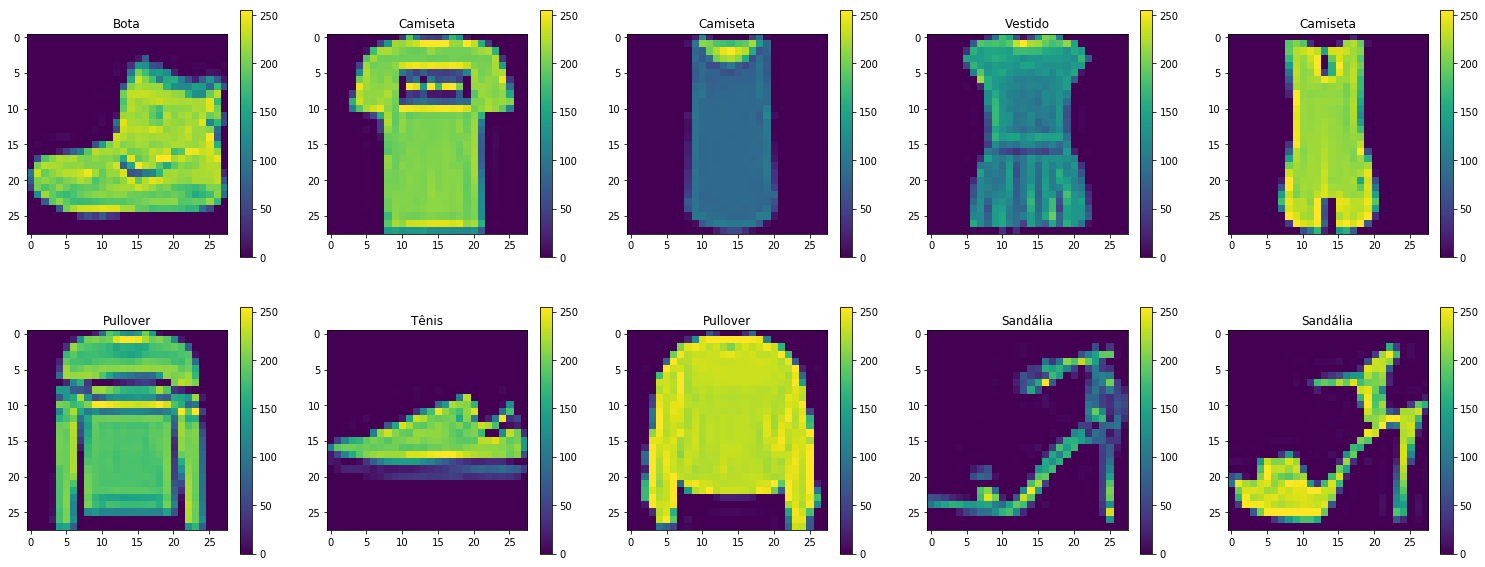

In [4]:
class_names = {0:'Camiseta', 1:'Calça', 2:'Pullover',
               3:'Vestido', 4:'Casaco', 5:'Sandália',
               6:'Camisa', 7:'Tênis', 8:'Bolsa', 9:'Bota'}

plt.figure(None, (26,10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title(class_names[ident_treino[i]])
    plt.imshow(img_treino[i])
    plt.colorbar()

### Normalizando

In [5]:
img_treino = img_treino/255
img_test = img_test/255

### Garantindo a Reprodutibilidade

In [6]:
# MASTER_SEED = 761

# np.random.seed(MASTER_SEED)
# tf.set_random_seed(MASTER_SEED)
# random.seed(MASTER_SEED)
# os.environ['PYTHONHASHSEED']=str(MASTER_SEED)

# from keras import backend as K
# session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
# K.set_session(sess)


##A linha que define a session_conf força o código a rodar sem nenhum paralelismo, que é uma fonte de aleatoriedade.
##Isso é garante que os resultados são reprodutíveis, mas torna o processo muito lento.
##Só vale a pena para testar.

### Definindo o Modelo

In [166]:
modelo = Sequential([Flatten(input_shape=(28, 28)), 
                     Dense(256, activation=tf.nn.relu),
                     Dropout(.5),
                     Dense(16, activation=tf.nn.sigmoid),
                     Dropout(.2),
                     Dense(8, activation=tf.nn.sigmoid),
                     Dense(10, activation=tf.nn.softmax)])

# modelo = Sequential([Flatten(input_shape=(28, 28)), 
#                      Dense(64, activation=tf.nn.relu),
#                      Dropout(.2),
#                      Dense(3, activation=tf.nn.sigmoid),
#                      Dense(6, activation=tf.nn.sigmoid),
#                      Dense(10, activation=tf.nn.sigmoid),
#                      Dense(10, activation=tf.nn.softmax)])

# modelo = Sequential([Flatten(input_shape=(28, 28)), 
#                      Dense(64, activation=tf.nn.relu),
#                      Dropout(.2),
#                      Dense(3, activation=tf.nn.relu),
#                      Dense(6, activation=tf.nn.relu),
#                      Dense(8, activation=tf.nn.relu),
#                      Dropout(.2),
#                      Dense(10, activation=tf.nn.softmax)])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historia = modelo.fit(img_treino, ident_treino, epochs=30, validation_split=.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 5s 130us/step - loss: 1.5366 - acc: 0.5875 - val_loss: 0.9617 - val_acc: 0.7822
Epoch 2/30
42000/42000 [==============================] - 4s 103us/step - loss: 0.8659 - acc: 0.7591 - val_loss: 0.6748 - val_acc: 0.7951
Epoch 3/30
42000/42000 [==============================] - 4s 107us/step - loss: 0.6844 - acc: 0.7825 - val_loss: 0.5508 - val_acc: 0.8153
Epoch 4/30
42000/42000 [==============================] - 4s 105us/step - loss: 0.6132 - acc: 0.7937 - val_loss: 0.4898 - val_acc: 0.8418
Epoch 5/30
42000/42000 [==============================] - 5s 107us/step - loss: 0.5631 - acc: 0.8140 - val_loss: 0.4680 - val_acc: 0.8517
Epoch 6/30
42000/42000 [==============================] - 5s 114us/step - loss: 0.5308 - acc: 0.8236 - val_loss: 0.4385 - val_acc: 0.8563
Epoch 7/30
42000/42000 [==============================] - 5s 115us/step - loss: 0.5086 - acc: 0.8317 - val_loss: 0.4257 - 

### Avaliando Aprendizado

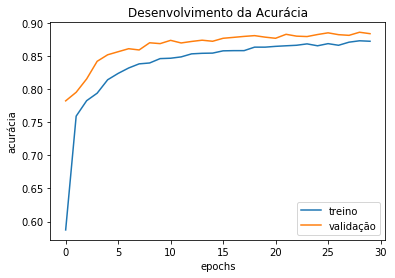

In [167]:
# Evolução da Acurácia

plt.plot(historia.history['acc'])
plt.plot(historia.history['val_acc'])
plt.title('Desenvolvimento da Acurácia')
plt.xlabel('epochs')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

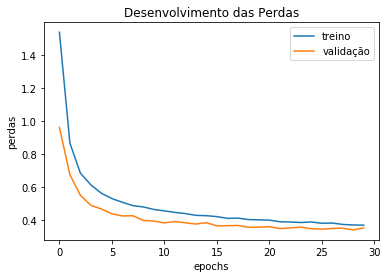

In [168]:
# Minimização de da função de perdas

plt.plot(historia.history['loss'])
plt.plot(historia.history['val_loss'])
plt.title('Desenvolvimento das Perdas')
plt.xlabel('epochs')
plt.ylabel('perdas')
plt.legend(['treino', 'validação'])

### Comparando Resultados

In [169]:
# testes = modelo.predict(img_test)
# [class_names[np.argmax(testes[i])] for i in range(10)]

In [170]:
# plt.figure(None, (26,10))
# for i in range(10):
#     plt.subplot(2, 5, i+1)
#     plt.title(class_names[ident_test[i]])
#     plt.imshow(img_test[i])
#     plt.colorbar()

In [159]:
perda_teste, acuracia_teste = modelo.evaluate(img_test, ident_test)
print(f'Perda: {perda_teste:.5}', f'Acurácia: {acuracia_teste:.2%}', sep='\n')

10000/10000 [==============================] - 0s 32us/step
Perda: 0.36057
Acurácia: 88.12%


### Salvando Modelo e Recuperando Modelo

In [13]:
modelo.save('modelo_fashion.h5')

In [14]:
from tensorflow.keras.models  import load_model
modelo_salvo = load_model('modelo_fashion.h5')